# The Normal Distribution

## What we will accomplish in this notebook

In this notebook we will:
- Give informal definitions of some important concepts from probability theory:
    - Continuous random variables
    - What is means for a random variable to be normally distributed with mean $\mu$ and variance $\sigma^2$ 
    - Probability Density Function (PDF) of a continuous random variable
    - Cumulative Distribution Function (CDF) of a continuous random variable
    - State the Central Limit Theorem (CLT)

Data science is about gaining insights from data in the face of uncertainty and variability.  

The first model we will study in this course is **linear regression**.  To specify this model we first need some basic tools for quantifying "random variability".  We will start with **normally distributed random variables**.

The Gaussian function with mean $\mu$ and variance $\sigma^2$ is defined as follows:

$$
f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{1}{2} \frac{(x - \mu)^2}{\sigma^2}\right)
$$

Note that $\sigma = \sqrt{\sigma^2}$ is called the standard deviation.  It is often more convenient mathematically to work directly with $\sigma^2$ as a parameter.

The **standard Gaussian** with $\mu = 0, \sigma = 1$ is an important special case.  All Gaussians can be thought of as scaled and shifted versions of this standard Gaussian.

You can play with an interactive graph to see how the parameters $\mu$ and $\sigma^2$ impact the shape of this function [here](https://www.desmos.com/calculator/g6u3qpry7h).

<img src="lecture_assets/gaussian.png" width="60%"></img>

Important points:

* The maximum value is achieved at $x = \mu$.
* $f$ is symmetric about the line $x = \mu$.
* $f$ has points of inflection at $x = \pm \sigma$.
* $f$ is continuous everywhere.
* $f(x) \geq 0$ for all $x \in \mathbb{R}$.
* The integral of $f$ from $-\infty$ to $\infty$ is 1.

The last three points allow us to use this function as a **probability density function** (pdf).  What do we mean by that?

Imagine that we are conducting an experiment whose outcome could, theoretically, be any real number.  For example we might measure the weight loss of an individual after 3 months on a particular treatment.  Positive numbers would represent losses and negative numbers would represent weight gains.  Call the amount of weight lost $X$.  This is an example of a **random variable**.

In the graph of $f$ above, these outcomes would be represented by points on the horizontal axis.  If we want to calculate the probability that $X$ is between two values $a$ and $b$ we **integrate** the probability density function from $a$ to $b$:

$$
P(a < X < b) = \int_a^b f(x)\textrm{ d}x
$$

<img src="lecture_assets/gauss_int.png" width="60%"></img>

* Continuity of the function $f$ ensures that this integral is well defined.
* Positivity of $f$ ensures that the probability is positive.
* $P(-\infty < X < \infty) = 1$ since $f$ integrates to 1.

A few of these normal distribution integrals are so common that you should probably memorize these approximations:

* $P(\mu-\sigma < X < \mu+\sigma) \approx 0.68$
* $P(\mu-2\sigma < X < \mu+2\sigma) \approx 0.95$
* $P(\mu-3\sigma < X < \mu+3\sigma) \approx 0.997$

In words, if $X$ is normally distributed then $68\%$ of observations will be within one standard deviation of the mean, $95\%$ of observations will be within two standard deviations of the mean, and $99.7\%$ of observations will be within three standard deviations of the mean.  

Notice that these integrals are independent of the mean $\mu$ and standard deviation $\sigma$!  We will see why in just a moment.

The **cumulative distribution function** $F$ of a random variable $X$ with pdf $f$ is defined by

$$
F_X(x) = P(X < x) = \int_{-\infty}^x f(t)
$$

In the case that $X \sim \mathcal{N}(\mu,\sigma^2)$ we have

$$
\begin{align*}
F_X(x) 
&= P(X < x)\\
&= \int_{-\infty}^{t = x} \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{1}{2} \frac{(t - \mu)^2}{\sigma^2}\right) \textrm{ d}t
\end{align*}
$$

Let $z = \frac{t - \mu}{\sigma}$.

$$
\int_{-\infty}^{z = \frac{x-\mu}{\sigma}} \frac{1}{\sqrt{2\pi}} \exp\left( -\frac{z^2}{2}\right) \textrm{ d}z
$$

Notice how we have obtained a *standard normal* cdf computation after making this change of variables!  We define $z = \frac{x-\mu}{\sigma}$ as the $z$-score.  It can only be computed if $\mu$ and $\sigma^2$ are **known** quantities, which is rarely the case in practice.  We generally have **point estimates** of these parameters instead. 

Traditionally the cdf of the standard normal distribution was computed by hand using numerical algorithms to a desired precision.  These values were written down in tables.  We will use Python instead!


In [20]:
from scipy import stats

# X is a standard normal random variable 
X = stats.norm(loc = 0,scale = 1)

In [21]:
# X.cdf(x) gives P(X<x).
X.cdf(1)

np.float64(0.8413447460685429)

QUESTION:  Before scrolling below the fold think about how you could use `X.cdf` to compute more precise values for the 68, 95, 99.7 rule we saw above.

__________


In [22]:
print(X.cdf(1) - X.cdf(-1))
print(X.cdf(2) - X.cdf(-2))
print(X.cdf(3) - X.cdf(-3))

0.6826894921370859
0.9544997361036416
0.9973002039367398


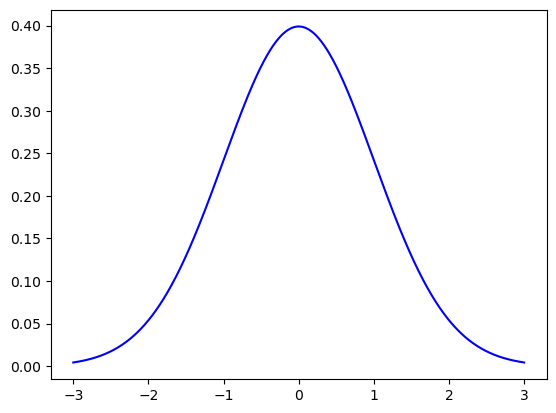

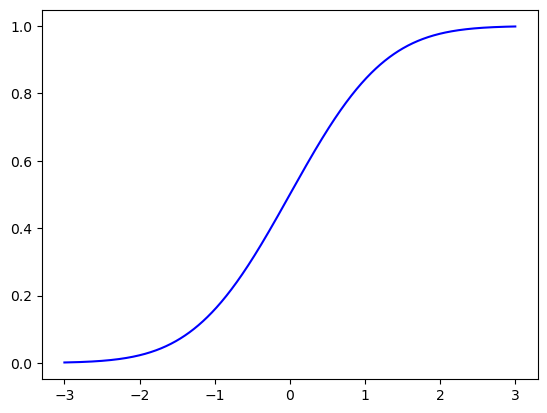

In [23]:
# Plot the standard normal pdf and cdf

import numpy as np
import matplotlib.pyplot as plt

mean = 0
std = 1

x = np.linspace(mean - 3*std, mean + 3*std,1000)
plt.plot(x,X.pdf(x),'b')

plt.show()

x = np.linspace(mean - 3*std, mean + 3*std,1000)
plt.plot(x,X.cdf(x),'b')

plt.show()

QUESTION:  Before scrolling below the fold think about how you could use Python to answer the following question.

Assume that $X$ is normally distributed with mean $5$ and standard deviation $1.3$.  What is the probability of obtaining a value greater than $7$?

-----------

Solution 1:

$P(X > 7) = 1 - P(X<7)$.  So we just need to take `1-X.cdf(7)` where `X` is normally distributed with mean $5$ and scale $1.3$.

In [24]:
X = stats.norm(loc = 5,scale = 1.3)
print(f" There is a {100*(1 - X.cdf(7)):.2f}% chance of X being larger than 7.")

 There is a 6.20% chance of X being larger than 7.


Solution 2:

We have a $z$ score of $\frac{7-5}{1.3} = \frac{2}{1.3}$.  So using the cdf of the standard normal distribution we have:

In [25]:
X = stats.norm(loc = 0,scale = 1)
print(f" There is a {100*(1 - X.cdf(2/1.3)):.2f}% chance of X being larger than 7.")

 There is a 6.20% chance of X being larger than 7.


We can draw a random sample from our distribution as follows:

In [26]:
# rvs stands for "random variates"
X.rvs(size = (4,2))

array([[ 0.43087847,  0.4721488 ],
       [ 0.15469241, -0.63961695],
       [ 0.45495695,  0.20028598],
       [ 0.49822109, -1.18861449]])

In [27]:
# We can also use numpy to return samples from the standard normal distribution:

print(np.random.randn(4,2))

# or from another normal distribution with specified mean and standard deviation:

print(np.random.normal(loc = 2, scale = 3, size = (4,2)))

[[-1.12376632 -0.45205025]
 [-0.98265059  0.26851811]
 [-1.69999397 -0.37661702]
 [ 1.15140282 -1.63419926]]
[[ 1.68886522  4.4730242 ]
 [ 5.18642408 -0.07266576]
 [-2.40860405  0.76909735]
 [-0.49647346 -2.11489937]]


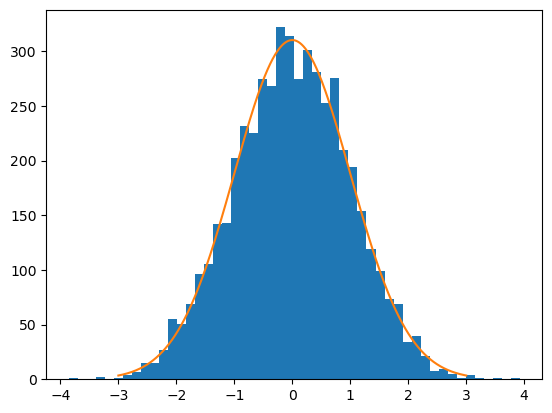

In [28]:
# A histogram helps to illustrate the connection to the pdf.

nobs = 5000
num_bins = 50

random_draws = X.rvs(size = nobs)
plt.hist(random_draws, bins=num_bins)

mean = 0
std = 1

x = np.linspace(-3,3,1000) 
bin_width = (random_draws.max() - random_draws.min()) / num_bins

# In a bin containing x the fraction of total samples should be roughly
# stats.norm.pdf(x) * bin_width
# Since there are nobs total samples, we should expect roughly
# stats.norm.pdf(x) * nobs * bin_width 
# samples in a bin containing x.
plt.plot(x, stats.norm.pdf(x) * nobs * bin_width)

plt.show()

## The Central Limit Theorem

Why is the normal distribution important? The usual answer to this question is the **central limit theorem** (CLT).  It would be more correct to say "theorems" since there are a family of similar results.  All of these results say something about mean of a sequence of random variables converging to a normal distribution.  Often the random variables are assumed to be independent and identically distributed but this can be relaxed.  One version, known as Lyapunov's CLT, is particularly "convincing":

**Lyapunov's CLT**

Let random variables $X_i$ be independent with expected values $\mu_i$ and variances $\sigma_i^2$ satisfying a slightly technical condition called [Lyapunov's condition](https://en.wikipedia.org/wiki/Central_limit_theorem#Lyapunov_CLT).

Define

$$s_n^2 = \sum_{i=1}^n \sigma_i^2 $$

then we have the following convergence ([in distribution](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_distribution)) as $n \to \infty$:

$$\frac{1}{s_n}\,\sum_{i=1}^{n} \left(X_i - \mu_i\right) \mathrel{\overset{d}{\longrightarrow}} \mathcal{N}(0,1) $$

This theorem tells us that we should expect to see normal distributions arising frequently in nature:  whenever something we measure is actually a sum or average of many independent stochastic constituent parts the measurement will follow a normal distribution.

For example, imagine we measure blood pressure across a population.  Each individual's blood pressure, on each individual day, is subject to many independent random perturbations:  how much salt the person ate in the hour before, how hydrated they are, whether they were exercising immediately before measurement, their overall diet, their overall exercise level, a multitude of different genetic factors which are randomly distributed through the population, etc.  If we believe that each of these hundreds of different determining factors could be modeled as independent random variables with *additive* effects on the final blood pressure measurement, then we should expect to see the distribution of blood pressures normally distributed in the population.

More commonly, however, rather than seeing our *direct measurements* being normally distributed we will use the fact that the sampling distribution of the mean should be roughly normal no matter what the underlying population distribution.

Let's see the CLT in action:

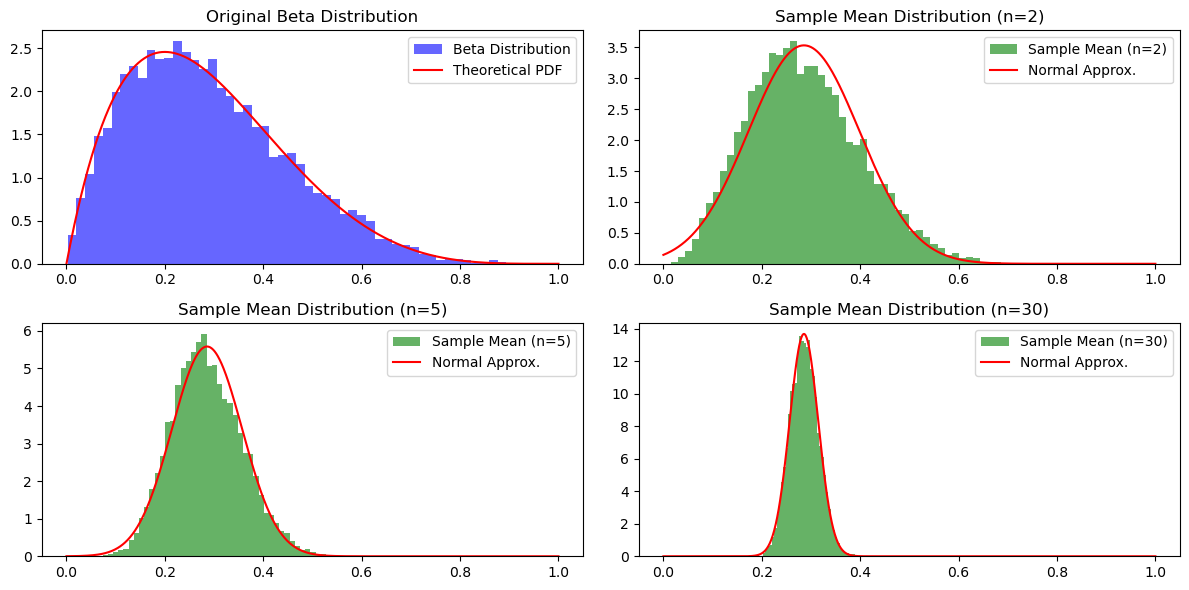

In [29]:
from scipy.stats import beta, norm

a, b = 2.0, 5.0 
size = 10000  

samples = beta.rvs(a, b, size=size)

# Compute sample means for different sample sizes
sample_sizes = [2, 5, 30]
means = {n: np.mean(beta.rvs(a, b, size=(size, n)), axis=1) for n in sample_sizes}

# Plot histogram of the original distribution
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(samples, bins=50, density=True, alpha=0.6, color='blue', label='Beta Distribution')
x = np.linspace(0, 1, 1000)
plt.plot(x, beta.pdf(x, a, b), 'r-', label='Theoretical PDF')
plt.title('Original Beta Distribution')
plt.legend()

# Plot histograms of sample means
for i, n in enumerate(sample_sizes, 2):
    plt.subplot(2, 2, i)
    plt.hist(means[n], bins=50, density=True, alpha=0.6, color='green', label=f'Sample Mean (n={n})')
    mu, sigma = beta.mean(a, b), beta.std(a, b) / np.sqrt(n)
    plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Normal Approx.')
    plt.title(f'Sample Mean Distribution (n={n})')
    plt.legend()

plt.tight_layout()
plt.show()

### Optional practice problems for you to complete after the lecture:

In [30]:
# Define a normal random variable X with mean 10 and standard deviation 2.
X = stats.norm(loc = 10, scale = 2)

In [31]:
# Find P(|X-11| > 3)
(1 - X.cdf(14)) + X.cdf(8)

np.float64(0.18140538587963628)

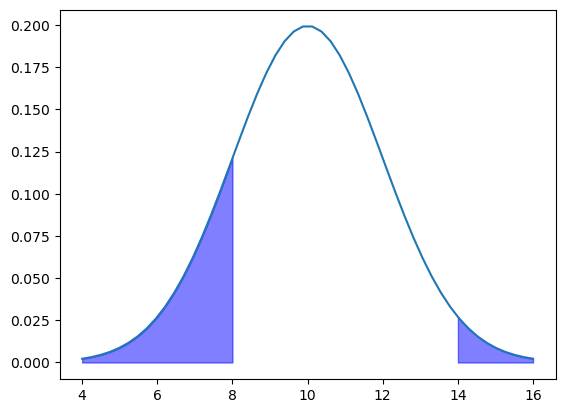

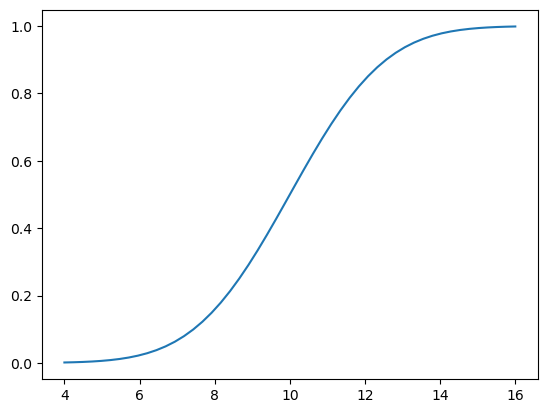

In [32]:
# Graph the pdf and cdf of $X$.  Shade the area under the pdf where |X-11| > 3.
plt.plot(np.linspace(4, 16), X.pdf(np.linspace(4, 16)))
plt.fill_between(np.linspace(14, 16),X.pdf(np.linspace(14, 16)), color = 'b', alpha = 0.5)
plt.fill_between(np.linspace(4, 8),X.pdf(np.linspace(4, 8)), color = 'b', alpha = 0.5)
plt.show()

plt.plot(np.linspace(4, 16), X.cdf(np.linspace(4, 16)))
plt.show()


In [33]:
# Draw 10000 random samples from this distribution and find what fraction of them have |X - 11| > 3.  
# Is the answer close to the probability you calculated?
random_draws = X.rvs(10000)
np.array([1*(abs(x - 11) > 3) for x in random_draws]).sum()/10000

np.float64(0.1847)